In [1]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn.model_selection import cross_val_score
import matplotlib as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.linear_model import RidgeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import ensemble
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score

In [2]:
df = pd.read_json('/Users/joshuarkarnad/Desktop/Thinkful/Data/reviews_Video_Games_5.json', lines=True)

In [3]:
df['Positive'] = (df['overall'] >= 4).astype(int)
column_names = ['asin', 'helpful', 'overall', 'summary', 'reviewTime',
                'reviewerID', 'reviewerName', 'unixReviewTime']
df = df.drop(column_names, axis=1)

In [4]:
keywords = ['struggle', 'best', 'awesome', 'bad', 'sucks', 'worst', 'fun', 
            'not', 'cool', 'great', 'wrong', 'brilliant', 
            'entertaining', 'awesome', 'good', 'horrible',
           'boring', 'broken', 'troubleshoot', 'wrong']
for key in keywords:
    df[str(key)] = df.reviewText.str.contains(
        ' ' + str(key) + ' ',
        case=False
    )
df_train, df_test = train_test_split(df, test_size=0.2)

In [6]:
df_train = df_train.drop('reviewText', axis=1)
df_test = df_test.drop('reviewText', axis=1)
X_train = df_train.loc[:, ~(df_train.columns).isin(['Positive'])]
X_test = df_test.loc[:, ~(df_test.columns).isin(['Positive'])]
Y_train = df_train.Positive
Y_test = df_test.Positive

In [7]:
from sklearn.metrics import accuracy_score
ridger = linear_model.RidgeClassifier()
ridger.fit(X_train, Y_train)
Y_pred_ridge = ridger.predict(X_test)
accuracy_score(Y_test, Y_pred_ridge)

0.76512209854172064

In [8]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = ensemble.GradientBoostingClassifier()
gbc.fit(X_train, Y_train)
Y_GBC_pred = gbc.predict(X_test)
accuracy_score(Y_test, Y_GBC_pred)

0.7660497023039089

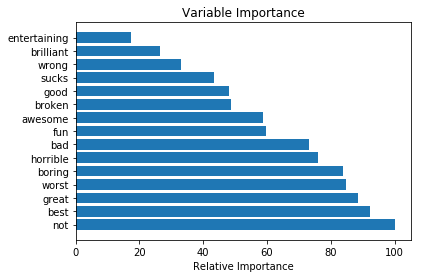

In [9]:
feature_importance = gbc.feature_importances_
import scipy
from sklearn import datasets
from sklearn.utils import shuffle
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)[::-1]
pos = np.arange(sorted_idx.shape[0]) + .5
plt.barh(pos[0:15], feature_importance[sorted_idx][0:15], align='center')
plt.yticks(pos[0:15], X_test.columns[sorted_idx][0:15])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

In [11]:
rfc = RandomForestClassifier()
rfc.fit(X_train, Y_train)
Y_RFC_Pred = rfc.predict(X_test)
accuracy_score(Y_test,Y_RFC_Pred)

0.76494952109759251

In [15]:
df2 = pd.read_json('/Users/joshuarkarnad/Downloads/reviews_Amazon_Instant_Video_5.json', lines=True)

In [16]:
df2['Positive'] = (df2['overall'] >= 4).astype(int)
column_names = ['asin', 'helpful', 'overall', 'summary', 'reviewTime',
                'reviewerID', 'reviewerName', 'unixReviewTime']
df2 = df2.drop(column_names, axis=1)

In [17]:
for key in keywords:
    df2[str(key)] = df2.reviewText.str.contains(
        ' ' + str(key) + ' ',
        case=False
    )

In [19]:
df2 = df2.drop('reviewText', axis=1)
df2.head()

,Positive,struggle,best,awesome,bad,sucks,worst,fun,not,cool,great,wrong,brilliant,entertaining,good,horrible,boring,broken,troubleshoot
0,0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,1,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False
4,1,False,True,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False


In [20]:
X = df2.loc[:, ~(df2.columns).isin(['Positive'])]
Y = df2.Positive

In [21]:
Y_predictions = ridger.predict(X)
accuracy_score(Y,Y_predictions)

0.79663847438452839